In [105]:
from sklearn import linear_model as lm
import torch
pd.set_option('display.max_columns', None)
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.nn as nn
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib 
import seaborn as sns
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.naive_bayes import MultinomialNB     # 从sklean.naive_bayes里导入朴素贝叶斯模型
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
#print('Tensorflow Version: {}'.format(tf.__version__))
import pandas as pd
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'# 只显示 Error
import warnings
warnings.filterwarnings("ignore")
from random import seed
import numpy as np
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

In [106]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

# 1. 数据及其分布

In [116]:
data = pd.read_csv("data.csv")
shuffled_data = shuffle(data).reset_index(drop=True)
data.head()

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
0,1,0.395032,0.393743,0.378640,21572414.74,21572414.74,1920840.568,63.867004,1.0,0.089042,0.089042,293.616407,0.077872
1,2,0.382076,0.378545,0.393967,29037202.25,29037202.25,2553017.942,46.184081,1.0,0.087922,0.087922,111.562104,0.099350
2,3,0.361179,0.357530,0.417032,24870699.23,24870699.23,2187843.247,49.910705,1.0,0.087969,0.087969,114.276679,0.108427
3,4,0.377965,0.374717,0.400799,27812575.93,27812575.93,2485072.157,45.546246,1.0,0.089351,0.089351,123.402273,0.153662
4,5,0.386587,0.384328,0.387534,23690912.29,23690912.29,2093395.335,56.853948,1.0,0.088363,0.088363,171.560867,0.117408


### 1.1:  v+, v-, vv

<AxesSubplot:xlabel='v+ ', ylabel='Density'>

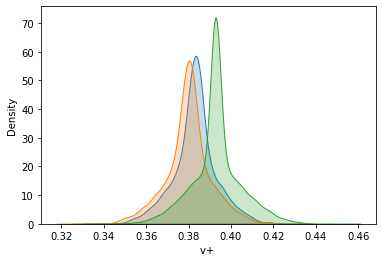

In [79]:
sns.kdeplot(data.iloc[:,1], shade=True)
sns.kdeplot(data.iloc[:,2], shade=True)
sns.kdeplot(data.iloc[:,3], shade=True)

### 1.2: R1, R2, 完全重合

<AxesSubplot:xlabel='R1 ', ylabel='Density'>

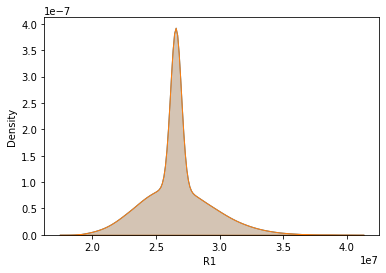

In [81]:
sns.kdeplot(data.iloc[:,4], shade=True)
sns.kdeplot(data.iloc[:,5], shade=True)

### 1.3: R3

<AxesSubplot:xlabel='R3 ', ylabel='Density'>

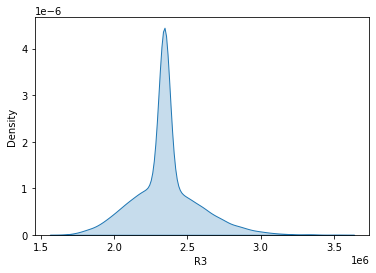

In [82]:
sns.kdeplot(data.iloc[:,6], shade=True)

### 1.4：I3(nA)

<AxesSubplot:xlabel='I3(nA)', ylabel='Density'>

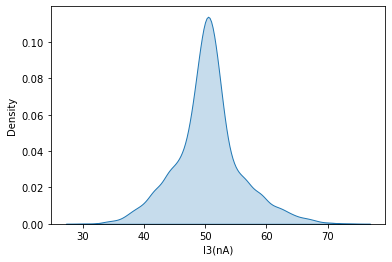

In [107]:
sns.kdeplot(data.iloc[:,7], shade=True)

### 1.5: 我们应该调整该数据嘛？（R2/R1)

<AxesSubplot:xlabel='R2/R1', ylabel='Density'>

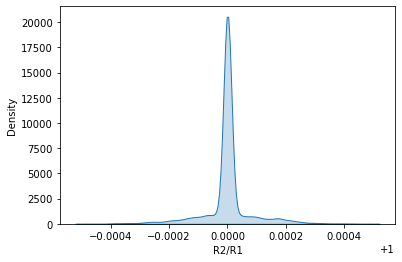

In [108]:
sns.kdeplot(data.iloc[:,8], shade=True)

### 1.6 这是R3/R1 和 R2/R1, 完全重合

<AxesSubplot:xlabel='R3/R1', ylabel='Density'>

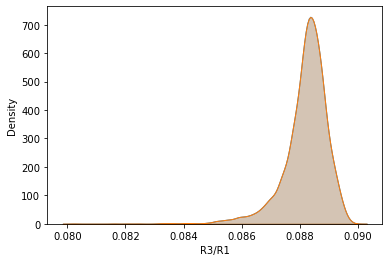

In [111]:
sns.kdeplot(data.iloc[:,9], shade=True)
sns.kdeplot(data.iloc[:,10], shade=True)

### 1.7: 该数据有部分远超2个标准差，是否会对训练造成严重影响

<AxesSubplot:xlabel='vv/[(v+)-(v-)]', ylabel='Density'>

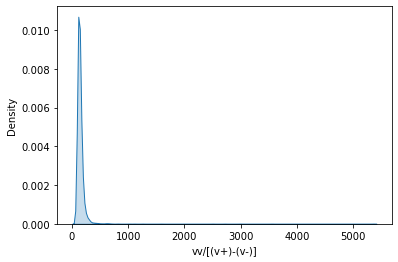

In [112]:
sns.kdeplot(data.iloc[:,11], shade=True)

### 1.8: Polarity

<AxesSubplot:xlabel='polarity', ylabel='Density'>

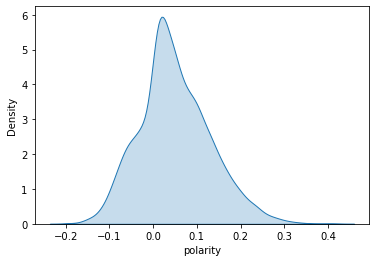

In [113]:
sns.kdeplot(data.iloc[:,12], shade=True)

# 2. Train + Validate, 获得 RMSE

## 各个模型的 RMSE

### 1. Linear Regression

In [157]:
linear()

0.06867884423101943

### 2. Ridge 

In [186]:
ridge()

0.07197745931527354

### 3. Support Vector Regression

In [122]:
run('SVR')

0.09550957230407434

### 4. Decision Tree

In [165]:
decision_tree()

['friedman_mse', 'best', None]


0.04082936545338918

### 5. Polynomial Regression

In [178]:
poly()

[2, True, True]


0.05166094443735068

### MLP

In [134]:
print(run ("MLP"))

Epoch 1/10
162/162 [==============================] - 1s 4ms/step - loss: 243818020864.0000 - val_loss: 6814608.0000
Epoch 2/10
162/162 [==============================] - 1s 3ms/step - loss: 5752548.5000 - val_loss: 5944196.5000
Epoch 3/10
162/162 [==============================] - 0s 3ms/step - loss: 5604373.0000 - val_loss: 5377560.5000
Epoch 4/10
162/162 [==============================] - 0s 3ms/step - loss: 5574810.0000 - val_loss: 6335008.0000
Epoch 5/10
162/162 [==============================] - 0s 3ms/step - loss: 5659232.0000 - val_loss: 5629166.0000
Epoch 6/10
162/162 [==============================] - 0s 3ms/step - loss: 5684673.5000 - val_loss: 10392585.0000
Epoch 7/10
162/162 [==============================] - 1s 3ms/step - loss: 6254711.5000 - val_loss: 5292887.0000
Epoch 8/10
162/162 [==============================] - 0s 3ms/step - loss: 5873645.5000 - val_loss: 6051149.0000
Epoch 9/10
162/162 [==============================] - 0s 3ms/step - loss: 5914778.0000 - val_loss:

# 3. 各模型的 implementation

In [156]:
# 线性回归
def linear():
    total_error = 0
    kf = KFold(n_splits=5)
    
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()
        
        
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        predicted = lr.predict(x_v)
        
        total_error = total_error + rmse(predicted, y_v_numpy)
        pass
    
    return total_error/5

In [185]:
def ridge():
    kf = KFold(n_splits=5)

    total = 0

    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()

        ridge = Ridge()
        ridge.fit(x_train, y_train)
        total = total + rmse(ridge.predict(x_v), y_v)
        
    return total/5

In [29]:
# SVR
def svr(x_train, y_train, x_v, eps, c):
    svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True)
    svr.fit(x_train, y_train)
    svr_predicted = svr.predict(x_v)

    return svr_predicted

In [164]:
# 决策树
def decision_tree():    
    
    # grid search
    least_rmse = 1000000000
    
    for cri in ['squared_error', 'friedman_mse', 'absolute_error']:
        for sp in ['best', 'random']:
            for max_feat in ['auto', 'sqrt', 'log2', None]:
                
                total = 0
                # cross validation
                for train, test in kf.split(shuffled_data):
                    train_data = shuffled_data.loc[train]
                    validate_data = shuffled_data.loc[test]
                    y_train = train_data['polarity']
                    x_train = train_data.iloc[:, 1:12]
                    y_v = validate_data['polarity']
                    x_v = validate_data.iloc[:, 1:12]
                    y_v_numpy = y_v.to_numpy()
                
                    decision = DecisionTreeRegressor(criterion = cri, splitter=sp, max_features = max_feat)
                    decision.fit(x_train, y_train)
                    result = decision.predict(x_v)
                    total = total + rmse(result, y_v)
                    pass
                
                
                if total/5 < least_rmse:
                    least_rmse = total/5
                    best_combination = [cri, sp, max_feat]
       

    print (best_combination)
    return least_rmse

In [177]:
def poly ():
    least_rmse = 1000000000
    
    for d in [2,3,4]:
        for interaction in [True, False]:
            for bias in [True, False]:
                total = 0
                
                # cross validation
                for train, test in kf.split(shuffled_data):
                    train_data = shuffled_data.loc[train]
                    validate_data = shuffled_data.loc[test]
                    y_train = train_data['polarity']
                    x_train = train_data.iloc[:, 1:12]
                    y_v = validate_data['polarity']
                    x_v = validate_data.iloc[:, 1:12]
                    y_v_numpy = y_v.to_numpy()
                
    
                    lr = LinearRegression()
                    quadratic = PolynomialFeatures(degree=d, interaction_only=interaction, include_bias=bias)
                    X_train_quad = quadratic.fit_transform(x_train)
                    lr.fit(X_train_quad, y_train)
                    total = total + rmse(y_v, lr.predict(quadratic.fit_transform(x_v)))
                    pass
                
                if total/5 < least_rmse:
                    least_rmse = total/5
                    best_combination = [d, interaction, bias]
                    pass
                    
    print (best_combination)    
    return least_rmse

In [61]:
def MLP():
    
    
    size, features = x_train.shape
    
    inputs = tf.keras.Input(shape=(features, ))
    hidden = tf.keras.layers.Dense(64, activation='relu')(inputs)
    hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
    outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

    tf_model = tf.keras.Model(inputs, outputs)
    tf_model.compile(
        optimizer = 'adam',
        loss = 'mse'
    )

    history = tf_model.fit(
        x_train,
        y_train,
        validation_split=0.12,
        batch_size=32,
        epochs=10
    )
    result = tf_model.predict(x_v)
    return result